# ML Task 2.1 Unsupervised learning algorithms - Part 1 dendrograms

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Data wrangling, z-score rescaling, 2-step transformation

#### 03. Dendrograms for z-score rescaled weather data

#### 03.01 Row-based clustering across 147 station-features

#### 03.02 Row-based clustering per station: "ward" method

#### 03.03 Row-based clustering per station: "average" method

#### 03.04 Row-based clustering per station: "complete" method

#### 03.05 Row-based clustering per station: "single" method

#### 04. Dendrograms for stationarized weather data

#### 04.01 Row-based clustering per station: "ward" method

#### 05. Principal Component Analysis (PCA)

#### 05.01 Import libraries, functions and tiny helpers

#### 05.02 Fit PCA: globally on all 147 station-features

#### 05.03 Export PCs (Principal Components), scaled weather subset and Pleasant weather answers subset datasets

### 01. Import libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
# Create path to dataset location
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets\Unsupervised'

In [6]:
# Import weather dataset and Pleasant Weather answers dataset, respectively
df = pd.read_csv(os.path.join(path, 'DATASET weather_prediction_dataset_processed.csv'))
df2 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [10]:
print(df.shape)
print(df2.shape)

(22950, 170)
(22950, 16)


### 02. Data wrangling, z-score rescaling, 2-step transformation

### NOTE: For this Task 2.1, aside from evaluating dendrograms & PCA results for z-score rescaled weather data, we also want to evaluate results for 2-step transformed (first differences, then z-score rescaling) original raw data, e.g. for data that has been stationarized for the most part.  We want to see how the clustering & dimensionality reduction outcomes for stationarized data compare with z-score rescaled (but NOT stationarized) data.  Stationarized data reportedly leads to more meaningful results in dendogram & PCA work. In general, weather time series raw data is decidedly non-stationary.

In [18]:
df.head(2)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1


In [20]:
df.tail(2)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22949,20221031,10,5,2.1,0.84,1.0193,1.34,0.22,0,3.2,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [22]:
df2.head(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df2.tail(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22949,20221031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Convert the 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df2['DATE'] = pd.to_datetime(df2['DATE'], format='%Y%m%d')

In [28]:
df.head(2)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1960-01-01,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1960-01-02,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1


In [30]:
df2.head(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Check dataframe info fully displayed
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 170 columns):
 #    Column                       Non-Null Count  Dtype         
---   ------                       --------------  -----         
 0    DATE                         22950 non-null  datetime64[ns]
 1    MONTH                        22950 non-null  int64         
 2    BASEL_cloud_cover            22950 non-null  int64         
 3    BASEL_wind_speed             22950 non-null  float64       
 4    BASEL_humidity               22950 non-null  float64       
 5    BASEL_pressure               22950 non-null  float64       
 6    BASEL_global_radiation       22950 non-null  float64       
 7    BASEL_precipitation          22950 non-null  float64       
 8    BASEL_snow_depth             22950 non-null  int64         
 9    BASEL_sunshine               22950 non-null  float64       
 10   BASEL_temp_mean              22950 non-null  float64       
 11   BASEL_temp_min            

In [37]:
# From prior Tasks we know the Pleasant weather answers dataset lacks Gdansk, Roma & Tours weather stations ...
# ... so we will omit these from the weather dataset.  We also drop the 'MONTH' column which is not needed.
columns_to_drop = ['MONTH', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',\
                   'TOURS_wind_speed','TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean',\
                   'TOURS_temp_min','TOURS_temp_max','GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', \
                   'GDANSK_temp_mean','GDANSK_temp_min', 'GDANSK_temp_max']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [39]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 148 columns):
 #    Column                       Non-Null Count  Dtype         
---   ------                       --------------  -----         
 0    DATE                         22950 non-null  datetime64[ns]
 1    BASEL_cloud_cover            22950 non-null  int64         
 2    BASEL_wind_speed             22950 non-null  float64       
 3    BASEL_humidity               22950 non-null  float64       
 4    BASEL_pressure               22950 non-null  float64       
 5    BASEL_global_radiation       22950 non-null  float64       
 6    BASEL_precipitation          22950 non-null  float64       
 7    BASEL_snow_depth             22950 non-null  int64         
 8    BASEL_sunshine               22950 non-null  float64       
 9    BASEL_temp_mean              22950 non-null  float64       
 10   BASEL_temp_min               22950 non-null  float64       
 11   BASEL_temp_max            

In [41]:
df.shape

(22950, 148)

#### Comment: Earlier Tasks on the weather dataset discovered inaccurate temperature data (mean, max, min) for Kassel & Valentia weather stations (flatlining -- no change in the data values -- for 8-10+ years at the tail end of the 60+ year temporal range of the dataset).  If we want to include these 2 weather station for the current dendogram & PCA analyses, then we need to pick a different time period that has no obvious inaccuracies.  We will check the 2001-2010 decade to see if we can avoid data inaccuracies on all 11 weather features per weather station.

In [47]:
# Subset to date range
df_2001_2010 = df[(df['DATE'] >= '2001-01-01') & 
                       (df['DATE'] <= '2010-12-31')]

# Drop DATE for numeric check
df_num = df_2001_2010.drop(columns='DATE')

# Compute variance and unique counts
variance = df_num.var()
unique_counts = df_num.nunique()

# Define thresholds
low_variance_cols = variance[variance < 1e-5].index.tolist()
low_unique_cols = unique_counts[unique_counts <= 2].index.tolist()

# Combine flagged columns
flatline_suspects = sorted(set(low_variance_cols) | set(low_unique_cols))

print(f"Flatline suspects ({len(flatline_suspects)} columns):")
print(flatline_suspects)

Flatline suspects (1 columns):
['VALENTIA_snow_depth']


In [55]:
df_num.shape

(3652, 147)

In [59]:
df_num['VALENTIA_snow_depth'].value_counts()

VALENTIA_snow_depth
0    3651
1       1
Name: count, dtype: int64

#### Comment: The Irish Meteorological Service notes that Valentia, Ireland gets only a few days of snow per year, with snow lying on the ground for a short period. Therefore, we will ignore the "flatline suspect" above, and keep Valentia weather station in the weather dataset for the Task 2.1 analyses.

In [71]:
df_2001_2010.head(2)

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14976,2001-01-01,7,2.1,0.68,1.0086,0.16,1.22,0,0.0,0.8,...,7,0.9,0.9702,0.14,1.09,0,0.0,8.9,7.3,10.5
14977,2001-01-02,8,2.1,0.81,1.0049,0.18,1.01,0,0.0,6.6,...,4,0.8,0.9842,0.24,0.14,0,1.7,7.0,5.6,8.7


In [73]:
df_2001_2010.tail(2)

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18626,2010-12-30,8,1.0,1.0,1.0242,0.13,0.0,8,0.0,0.0,...,5,0.82,1.0142,0.24,0.41,0,3.4,10.7,7.9,11.7
18627,2010-12-31,8,1.0,1.0,1.0251,0.13,0.0,6,0.0,0.1,...,5,0.82,1.0142,0.32,0.41,0,3.4,10.7,7.9,8.6


In [63]:
# Also subset the Pleasant Weather answers dataset to the chosen decade date range
df2_2001_2010 = df2[(df2['DATE'] >= '2001-01-01') & 
                       (df2['DATE'] <= '2010-12-31')]

In [65]:
df2_2001_2010.shape

(3652, 16)

In [67]:
df2_2001_2010.head(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14976,2001-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14977,2001-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
df2_2001_2010.tail(2)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18626,2010-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18627,2010-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Since the original dataframes are no longer needed, these can be deleted to conserve RAM for the notebook session
# The gc.collect() command is a garbage collector to encourage immediate memory release

import gc
del df
gc.collect()

463

In [77]:
del df2

In [79]:
gc.collect()

3774

#### z-score rescaling of 2001-2010 weather data subset dataframe

In [87]:
df_num.shape

(3652, 147)

In [89]:
df_num.head(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14976,7,2.1,0.68,1.0086,0.16,1.22,0,0.0,0.8,-1.3,...,7,0.9,0.9702,0.14,1.09,0,0.0,8.9,7.3,10.5
14977,8,2.1,0.81,1.0049,0.18,1.01,0,0.0,6.6,3.5,...,4,0.8,0.9842,0.24,0.14,0,1.7,7.0,5.6,8.7
14978,6,2.1,0.70,1.0118,0.37,0.00,0,2.4,7.0,3.3,...,6,0.9,0.9881,0.14,1.04,0,0.1,6.8,3.5,10.0


In [91]:
df_num.tail(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18625,8,1.6,0.97,1.0232,0.20,0.0,12,0.0,0.7,-0.1,...,5,0.82,1.0142,0.21,0.41,0,3.4,10.7,7.9,11.4
18626,8,1.0,1.00,1.0242,0.13,0.0,8,0.0,0.0,-0.4,...,5,0.82,1.0142,0.24,0.41,0,3.4,10.7,7.9,11.7
18627,8,1.0,1.00,1.0251,0.13,0.0,6,0.0,0.1,-0.5,...,5,0.82,1.0142,0.32,0.41,0,3.4,10.7,7.9,8.6


In [98]:
# Check for missing values
# As a workaround to output truncation that occurs when there are many columns, convert result to a string, which will print without truncation

null_counts = df_num.isnull().sum()
print(null_counts.to_string())

BASEL_cloud_cover              0
BASEL_wind_speed               0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_snow_depth               0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BELGRADE_cloud_cover           0
BELGRADE_humidity              0
BELGRADE_pressure              0
BELGRADE_global_radiation      0
BELGRADE_precipitation         0
BELGRADE_sunshine              0
BELGRADE_temp_mean             0
BELGRADE_temp_min              0
BELGRADE_temp_max              0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_min              0
BUDAPEST_temp_max              0
DEBILT_cloud_cover             0
DEBILT_win

##### No NaNs.

In [101]:
# Instantiate the z-score rescaler
scaler = StandardScaler()

In [103]:
# Create new df with scaled data, then display first 3 rows
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_scaled.head(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.663510,-0.214996,-0.612636,-1.136837,-1.255674,1.817868,-0.173863,-1.061125,-1.326661,-1.193256,...,0.715728,0.951297,-3.776689,-1.189451,0.384473,-0.01655,-1.020485,-0.629896,-0.279187,-0.870120
1,1.097452,-0.214996,0.569221,-1.603673,-1.234239,1.429848,-0.173863,-1.061125,-0.560366,-0.486081,...,-1.022967,-0.197064,-2.583562,-1.070629,-0.198807,-0.01655,-0.565555,-1.174101,-0.710733,-1.353503
2,0.229567,-0.214996,-0.430812,-0.733088,-1.030599,-0.436343,-0.173863,-0.504882,-0.507518,-0.515547,...,0.136163,0.951297,-2.251191,-1.189451,0.353774,-0.01655,-0.993725,-1.231386,-1.243819,-1.004393


In [105]:
df_scaled.shape

(3652, 147)

#### 2-step transformation

#### This sequential transformation is to create a stationarized version of the 2001-2010 subset dataset for separate dendogram clustering & PCA dimensionality reduction, for comparative purposes.  The first step is to calculate first differences, followed by the second step to z-score rescale those numbers.  This combination is expected to render the original raw data fully or mostly stationarized, which reportedly leads to more meaningful results on both the dendogram clustering and the PCA dimensionality reduction fronts.

In [110]:
# First differencing for all numeric columns
df_num_diff = df_num.diff(periods=1)

# Drop the first row because differencing creates a NaN there
df_num_diff = df_num_diff.dropna()

# Check dimensions and differencing result
print(df_num_diff.shape)
df_num_diff.head(3)

(3651, 147)


,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14977,1.0,0.0,0.13,-0.0037,0.02,-0.21,0.0,0.0,5.8,4.8,...,-3.0,-0.10,0.0140,0.1,-0.95,0.0,1.7,-1.9,-1.7,-1.8
14978,-2.0,0.0,-0.11,0.0069,0.19,-1.01,0.0,2.4,0.4,-0.2,...,2.0,0.10,0.0039,-0.1,0.90,0.0,-1.6,-0.2,-2.1,1.3
14979,1.0,0.0,0.01,-0.0035,-0.24,0.04,0.0,-2.2,-0.3,0.0,...,0.0,0.01,-0.0005,0.2,-1.03,0.0,2.5,0.3,0.4,0.2


In [112]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform differenced data
scaled_values = scaler.fit_transform(df_num_diff)

# Re-wrap into DataFrame with same column names
df_diff_scaled = pd.DataFrame(
    scaled_values,
    columns=df_num_diff.columns
)

# Quick check
print(df_diff_scaled.shape)
print(df_diff_scaled.head(3))

(3651, 147)
   BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.414554          0.000247        1.492755       -0.768732   
1          -0.829449          0.000247       -1.264960        1.430894   
2           0.414554          0.000247        0.113898       -0.727229   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                0.030711            -0.309350         -0.001318   
1                0.291643            -1.489704         -0.001318   
2               -0.368362             0.059511         -0.001318   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0   -3.756659e-18         2.665400        2.028831  ...             -1.660843   
1    5.790880e-01         0.183903       -0.084631  ...              1.107734   
2   -5.308307e-01        -0.137773       -0.000093  ...              0.000303   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0          -1.141284   

#### df_diff_scaled is now our stationarized 2001-2010 subset dataset.

##### Drop 'DATE' column from the Pleasant weather answers subset (2001-2010) dataframe for the 15 weather stations, as not needed for some data manipulations

In [306]:
pleasant_ans_2001_2010 = df2_2001_2010.drop(columns='DATE')

In [308]:
pleasant_ans_2001_2010.shape

(3652, 15)

In [310]:
pleasant_ans_2001_2010.head(3)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [312]:
pleasant_ans_2001_2010.tail(3)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 03. Dendrograms

### All weather stations / Z-score scaled (but not Stationarized) 2001-2010 subset weather dataset

#### Elaboration on the 4 clustering methods (*aka* "linkages") explored here: "Ward" forms clusters to minimize the increase in total *within-cluster* variance, creating compact spherical groups; "Average" forms clusters based on the average pairwise distance between all points across the clusters, balancing extremes; "Complete" forms clusters according to the maximum distance between their point, producing tight, evenly-sized groups; and "Single" forms clusters by the minimum distance between points, usually generating long chain-type clusters.

### 03.01 Row-based clustering across 147 station-features

#### Dendograms reveal the hierarchical structure of patterns which can be explored via aggregated groupings or disaggregated groupings, by moving the dendogram "cut" line up or down, respectively. I have chosen a distance-maximizing high-level cut line because the ClimateWins project seeks to use ML tools to reveal climate change patterns across a secular temporal period (emphasis on decades, not years, months or days) to try to (eventually) predict extreme weather events over a 25-50 year forecast period. To align with project goals, we need to see "the forest" of patterns here, revealed by clustering results at a higher level for one decade (2001-2010) of subsetted observations. Metaphorically, a telescope serves better for such a skew level, compared to zooming in via binoculars, glasses, magnifying glass or microscope.

#### The linkage() function default clustering logic performs row-wise (row-based) clustering across all numerical columns, if these are left unfiltered.  The following custom function performs row-based clustering under each of the 4 methods, for all columns (147 station-features), outputting dendograms, cut levels (heights) that attempt to "generalize" to fewer clusters, and the number of clusters associated with that dotted horizontal line cut-level.  If we wanted to perform the clustering on a different axis -- eg not on the rows, instead on the columns -- then we would have to feed a transposed dataframe (rotated 90 degrees, where columns become the new rows, and rows the new columns) to the linkage() function. Here we choose the default row-based clustering.

In [254]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# --- core: build linkage on rows or columns ---
def compute_linkage(X: pd.DataFrame, method="ward", metric="euclidean", mode="rows"):
    """
    X: DataFrame (n_rows x n_cols)
    mode='rows'    -> cluster observations (days)
    mode='columns' -> cluster features (stations*features); internally uses X.T
    """
    if mode not in ("rows", "columns"):
        raise ValueError("mode must be 'rows' or 'columns'")

    A = X if mode == "rows" else X.T
    D = pdist(A.values, metric=metric)
    Z = linkage(D, method=method)
    return Z, A  # return the matrix actually clustered

# --- auto cut height via largest jump in merge distances ---
def auto_cut_height(Z):
    heights = Z[:, 2]  # distances at merges
    jumps = np.diff(heights, prepend=0)
    j = np.argmax(jumps)
    cut = heights[j]
    return float(cut), int(j)

# --- count clusters at threshold cut ---
def count_clusters_at_distance(Z, cut):
    # number of clusters k at threshold 'cut'
    # (classic formula: start with n leaves, subtract merges below cut)
    n_leaves = Z.shape[0] + 1
    merges_below = np.sum(Z[:, 2] < cut)
    k = int(n_leaves - merges_below)
    return k

# Plot dendogram
def plot_dendrogram_with_cut(Z, cut_height=None, title="Dendrogram"):
    plt.figure(figsize=(9, 5))
    dendrogram(Z, no_labels=True, color_threshold=None)
    if cut_height is not None:
        plt.axhline(cut_height, color="crimson", ls="--", lw=2, label=f"cut @ {cut_height:.3g}")
        plt.legend()
    plt.title(title)
    plt.xlabel("Samples / Features")
    plt.ylabel("Distance (dissimilarity)") 
    plt.tight_layout()
    plt.show()

# --- top-level convenience across methods with mode ---
def cluster_summary_across_methods(
    X: pd.DataFrame,
    methods=("ward", "average", "complete", "single"),
    metric="euclidean",
    mode="rows",
):
    """
    Returns:
      summary_df: per-method table with cut, jump_idx, k
      labels_by_method: dict[str -> np.ndarray], length matches
                        X.shape[0] if mode='rows', X.shape[1] if mode='columns'
    """
    from scipy.cluster.hierarchy import fcluster

    out_rows = []
    labels_dict = {}

    for m in methods:
        Z, A = compute_linkage(X, method=m, metric=metric, mode=mode)
        cut, j = auto_cut_height(Z)
        k = count_clusters_at_distance(Z, cut)

        # flat cluster labels at 'cut' (distance criterion)
        labs = fcluster(Z, t=cut, criterion="distance")

        # sanity: labs length must match the object we clustered
        expected = A.shape[0]
        if len(labs) != expected:
            raise RuntimeError(f"[{m}] label length {len(labs)} != clustered length {expected}")

        # store labels in the original orientation
        if mode == "rows":
            # one label per row (index) of X
            lab_series = pd.Series(labs, index=X.index, name=f"cluster_{m}")
        else:
            # one label per column of X
            lab_series = pd.Series(labs, index=X.columns, name=f"cluster_{m}")

        labels_dict[m] = lab_series.values

        out_rows.append({
            "method": m,
            "cut": cut,
            "jump_idx": j,
            "n_clusters": k,
            "mode": mode
        })
        # Call dendogram plotting function
        plot_dendrogram_with_cut(Z, cut, title=f"Dendrogram — {m} (auto cut → {k} clusters)")
    
    summary_df = pd.DataFrame(out_rows).set_index("method")
    return summary_df, labels_dict

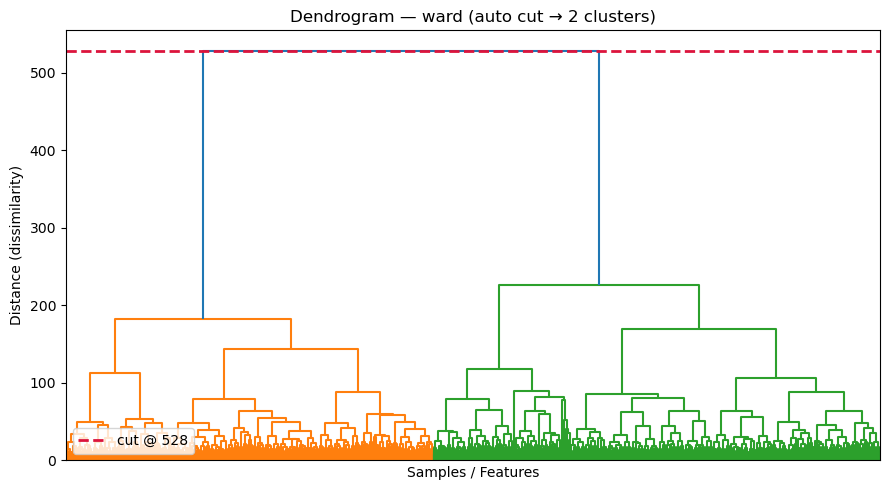

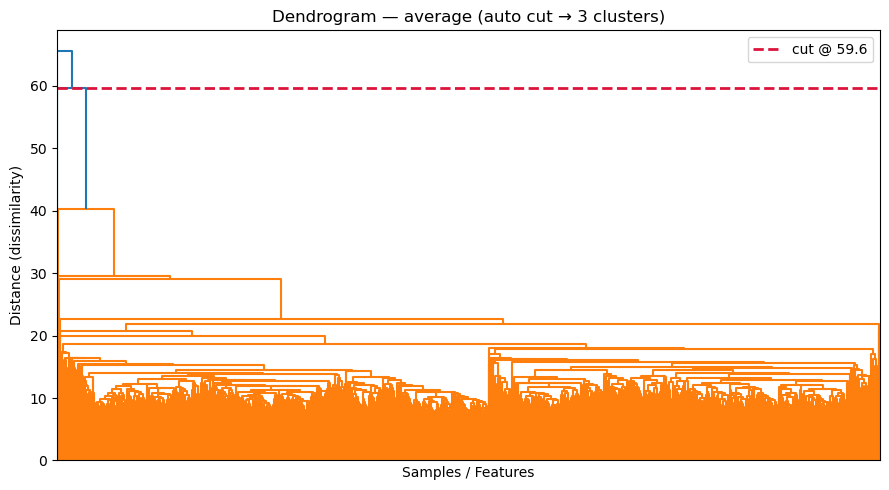

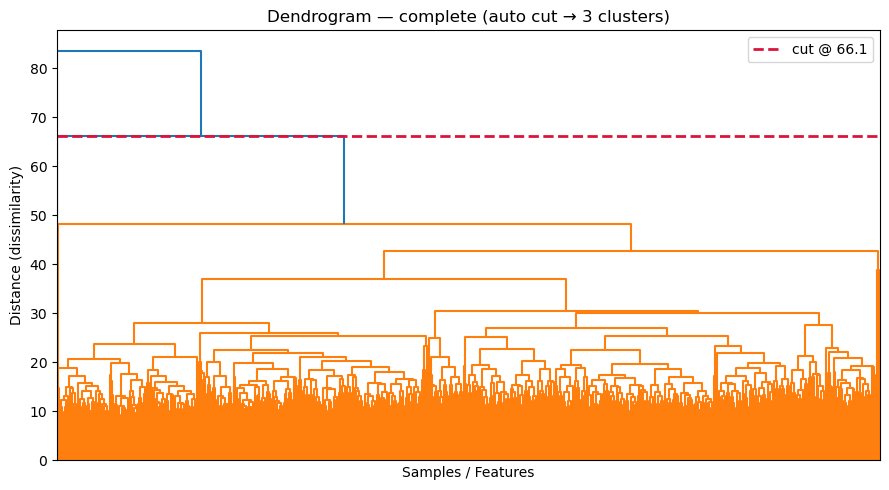

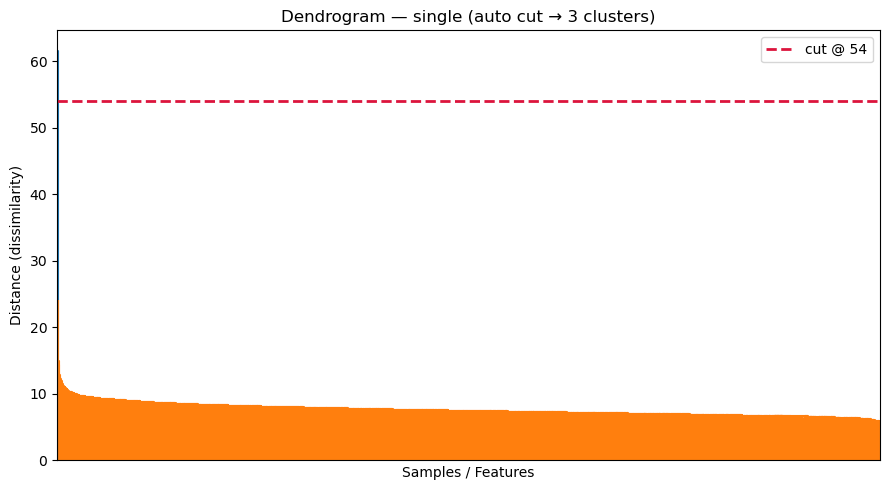

In [256]:
row_summary, row_labels = cluster_summary_across_methods(
    df_scaled, methods=["ward", "average", "complete", "single"], mode="rows"
)

In [258]:
row_summary

,cut,jump_idx,n_clusters,mode
method,,,,
ward,528.327803,3650,2,rows
average,59.634110,3649,3,rows
complete,66.094962,3649,3,rows
single,54.036139,3649,3,rows


##### Check the row_labels dictionary for content, length of arrays and cluster counts.

In [260]:
row_labels

{'ward': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'average': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'complete': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'single': array([1, 1, 1, ..., 1, 1, 1], dtype=int32)}

In [262]:
for key, array_value in row_labels.items():
    print(f"Length of '{key}': {len(array_value)}")

Length of 'ward': 3652
Length of 'average': 3652
Length of 'complete': 3652
Length of 'single': 3652


In [264]:
value_counts_results = {}

for key, array in row_labels.items():
    unique_values, counts = np.unique(array, return_counts=True)
    value_counts_results[key] = dict(zip(unique_values, counts))

print(value_counts_results)

{'ward': {1: 3652}, 'average': {1: 3651, 2: 1}, 'complete': {1: 3651, 2: 1}, 'single': {1: 3651, 2: 1}}


#### Row-based clustering over 10 years of daily data created an overwhelming "large-vs-nano" dichotomy in cluster size extremes (as shown in the value_counts_results hierarchical "nested" dictionary above), which looks like "noise" instead of structure. Changing the clustering approach to cluster the rows per weather station (rather than for the entire group of 15 weather stations) should reduce that noise in the dataset, where also the number of weather features can vary from station to station (the feature set or feature group per station can vary, eg non-uniform).

#### 03.02 Row-based clustering per station: "ward" method

#### Why cluster rows per station?  Each weather station has up to 11 features per day.  If clustering is restricted to those features only, then: (i) each day is compared only within that station's context, not against all other stations; and (ii) the Pleasant answers dataset labels are (a) at the daily level and (b) at the individual station level, so we need the "grain" (my term for it, if imprecise) of the clustering to approximate or match that of the answers dataset labels, to facilitate "like-with-like" skew comparisons that are relevant and ideally, more accurate.  This level of clustering will allow us to directly compare clustering results with the daily Pleasant/Unpleasant weather answers outcomes. Also, adopting the per-station clustering route avoids the dilution and "noise" we saw when performing row-based clustering on 147 station-features (where many unrelated correlations might swamp day-level variance) using 10 years of daily data.

#### The custom function and helper that follow plot a matrix of dendograms for the chosen method (i.e. 'ward'), where each dendogram reflects the station-specific (e.g. filtered) row-wise clustering outcome, with cut levels chosen to maximize the associated Silhouette score (1.0=best,-1.0=worst). The Silhouette score is a quantitative measure of the quality of clustering (how well-defined and separated are the clusters?). A range of 2, 3 or 4 clusters was specified as a constraint to ensure we see "the forest" of patterns rather than individual tree groups or trees, so to speak. Besides the dendogram matrix, the custom function outputs several tables that help us see the quality of the cuts (at least as defined by the Silhouette score metric) and the cluster counts.  Here we hope to see more balanced cluster sizes (e.g. not the "large-nano" extreme size differences encountered previously when including all 147 columns in the unfiltered dataset).

In [298]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_station_dendrograms_with_summary(
    df_scaled: pd.DataFrame,
    stations: list[str],
    method: str = "ward",
    candidate_ks: tuple = (2,3,4),
    n_cols: int = 5,
    figscale: float = 4.0,
):
    """
    For each station:
      - hierarchical clustering on rows (days)
      - choose k from candidate_ks with best silhouette
      - cut tree at that height, extract labels
      - plot dendrogram with cut line
      - return (summary_df, labels_dict, counts_df)
    """
    results = []
    labels_dict = {}
    counts_dict = {}

    n_stations = len(stations)
    n_rows = int(np.ceil(n_stations / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figscale*n_cols, figscale*n_rows))
    axes = np.atleast_1d(axes).ravel()

    for i, st in enumerate(stations):
        ax = axes[i]
        cols = [c for c in df_scaled.columns if c.startswith(st)]
        if len(cols) == 0:
            ax.axis("off")
            ax.set_title(f"{st}\n(no columns)", fontsize=10)
            continue

        X = df_scaled[cols].values
        Z = linkage(X, method=method, metric="euclidean")

        # pick k by silhouette
        best_k, best_sil, best_cut = None, -np.inf, None
        for k in candidate_ks:
            cut = _find_cut_for_k(Z, k)
            labels_try = fcluster(Z, t=cut, criterion="distance")
            if len(np.unique(labels_try)) < 2:
                continue
            # Silhouette needs at least 2 clusters
            try:
                sil = silhouette_score(X, labels_try)
            except Exception:
                sil = -np.inf
            if sil > best_sil:
                best_k, best_sil, best_cut = k, sil, cut

        # fallback if silhouette selection failed
        if best_k is None:
            best_k = candidate_ks[0]
            best_cut = _find_cut_for_k(Z, best_k)
            labels = fcluster(Z, t=best_cut, criterion="distance")
        else:
            labels = fcluster(Z, t=best_cut, criterion="distance")

        labels_dict[st] = labels
        counts = pd.Series(labels).value_counts().sort_index()
        counts_dict[st] = counts.to_dict()

        results.append({
            "Station": st,
            "Method": method,
            "Chosen_k": int(best_k),
            "Cut_height": float(np.round(best_cut, 2)),
            "Silhouette": None if not np.isfinite(best_sil) else float(np.round(best_sil, 3))
        })

        # plot dendrogram
        dendrogram(Z, no_labels=True, ax=ax, color_threshold=best_cut)
        ax.axhline(best_cut, ls="--", c="red", lw=1.4)
        ax.set_title(f"{st} — {method}\n{best_k} clusters, Cut={best_cut:.1f}", fontsize=10)
        ax.set_xlabel("Days")
        ax.set_ylabel("Distance")

    # remove unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    summary_df = pd.DataFrame(results).set_index("Station")
    counts_df = pd.DataFrame(counts_dict).T.fillna(0).astype(int)
    counts_df.columns = [f"Cluster {c}" for c in counts_df.columns]

    return summary_df, labels_dict, counts_df

In [300]:
# --- helpers used by the plotting function ---

from scipy.cluster.hierarchy import fcluster
import numpy as np

def _station_cols(df, station_prefix: str):
    """All columns that belong to a given station (prefix_...)."""
    return [c for c in df.columns if c.startswith(station_prefix)]

def _find_cut_for_k(Z, k: int):
    """
    Given a SciPy linkage matrix Z and desired number of clusters k,
    return a distance threshold (cut height) that yields exactly k clusters.
    Strategy:
      - Merge heights are Z[:, 2]. If you cut between two consecutive merge heights,
        the number of clusters changes by 1.
      - We binary-search a height that produces the requested k via fcluster(..., criterion='distance').
    """
    heights = Z[:, 2]
    lo = 0.0
    hi = float(heights.max()) + 1e-6  # slightly above the last merge

    # quick guards:
    # cut at 0 -> N clusters (each point); cut at hi -> 1 cluster
    # we want something in between that yields k
    for _ in range(60):  # plenty for convergence
        mid = 0.5 * (lo + hi)
        labels = fcluster(Z, t=mid, criterion="distance")
        k_mid = len(np.unique(labels))
        if k_mid > k:
            # too many clusters => cut is too low -> raise the cut
            lo = mid
        elif k_mid < k:
            # too few clusters => cut too high -> lower the cut
            hi = mid
        else:
            return mid
    # If we didn’t hit exactly, return the best we can (closest side)
    return 0.5 * (lo + hi)

#### Specify list of stations to explore

In [302]:
stations = [
    "BASEL","BELGRADE","BUDAPEST","DEBILT","DUSSELDORF",
    "HEATHROW","KASSEL","LJUBLJANA","MAASTRICHT","MADRID",
    "MUNCHENB","OSLO","SONNBLICK","STOCKHOLM","VALENTIA"
]

#### Call the custom function

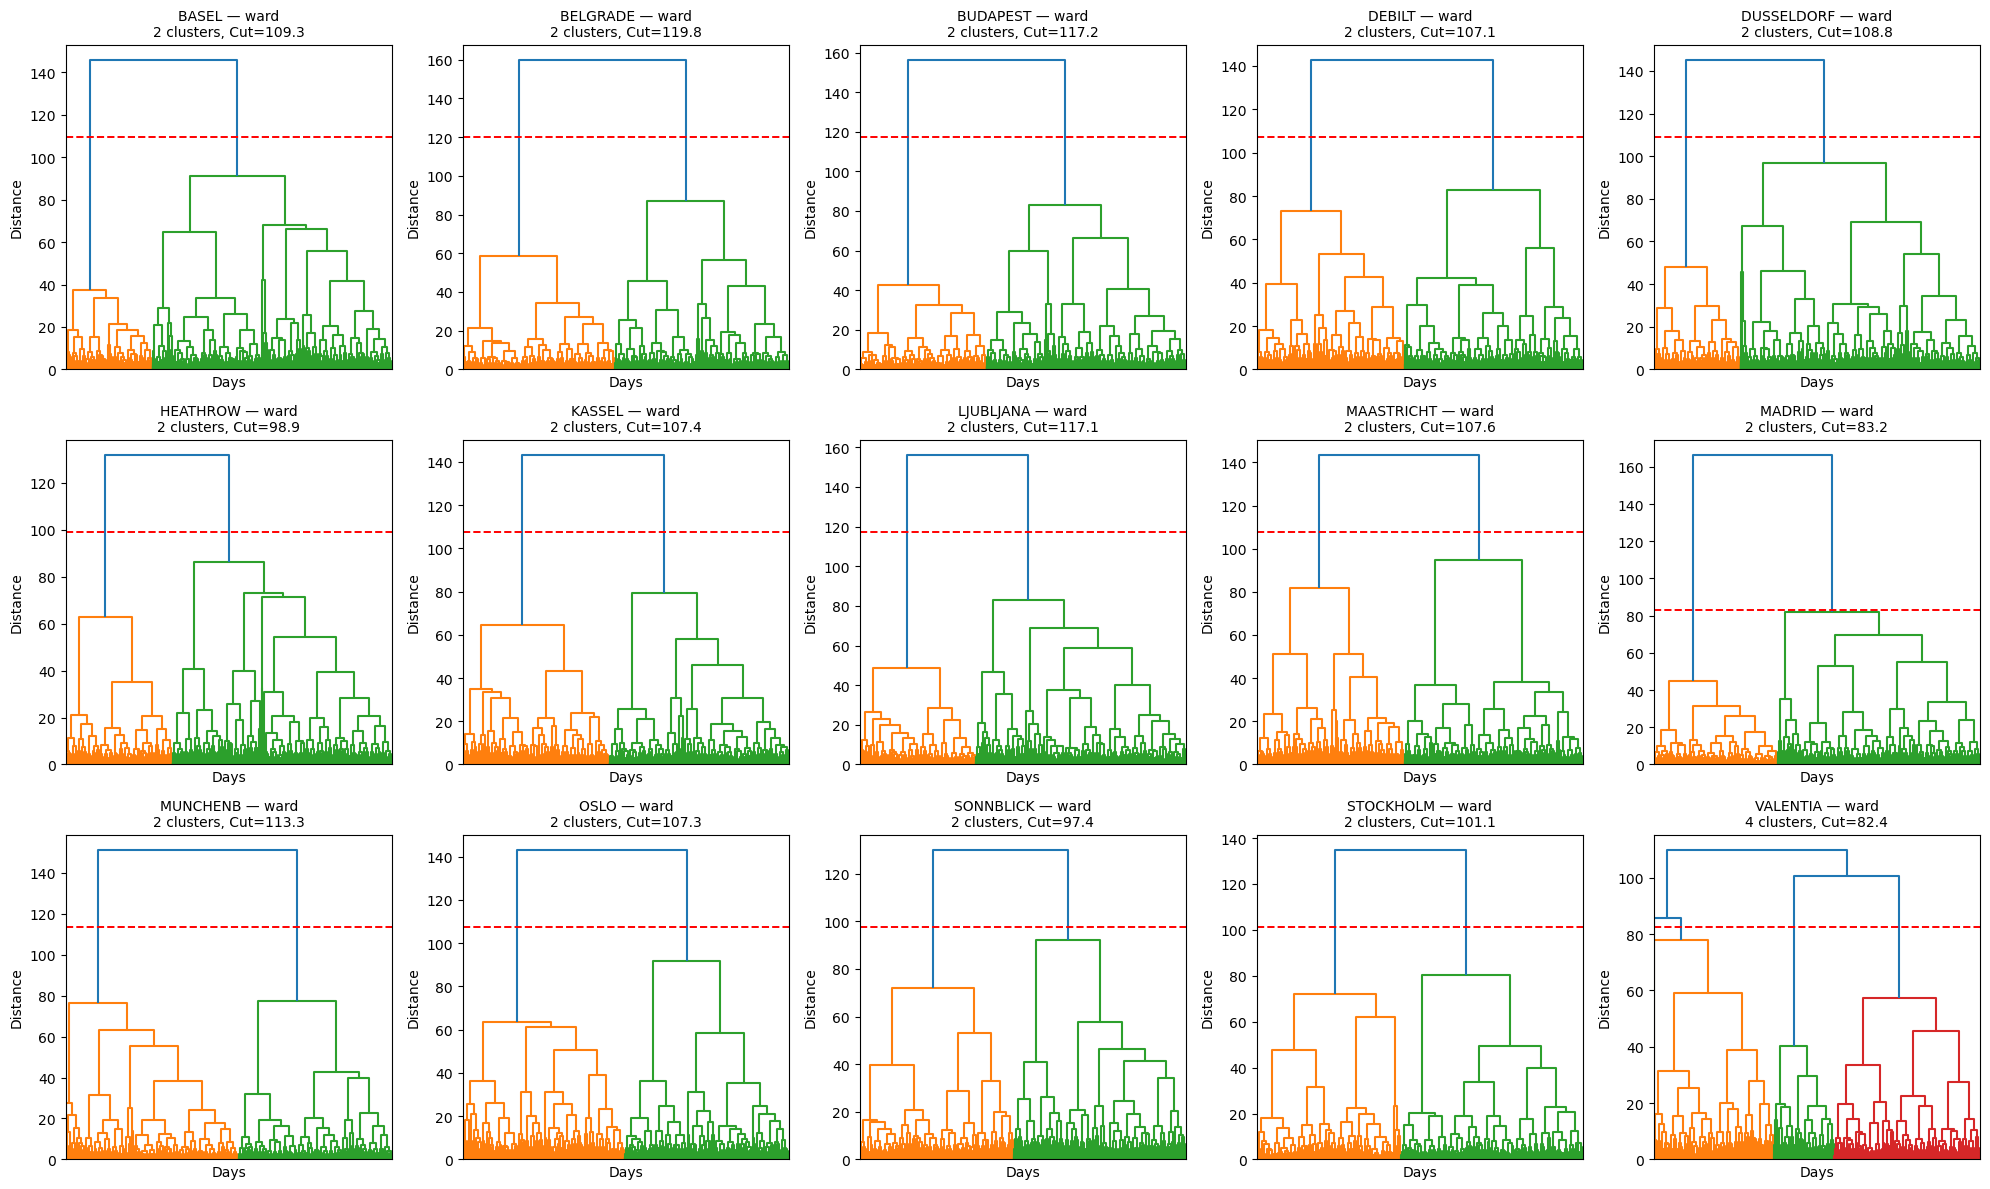

,Method,Chosen_k,Cut_height,Silhouette
Station,,,,
BASEL,ward,2,109.31,0.261
BELGRADE,ward,2,119.84,0.332
BUDAPEST,ward,2,117.17,0.326
DEBILT,ward,2,107.05,0.250
DUSSELDORF,ward,2,108.83,0.262
HEATHROW,ward,2,98.95,0.224
KASSEL,ward,2,107.39,0.270
LJUBLJANA,ward,2,117.08,0.296
MAASTRICHT,ward,2,107.56,0.254


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
BASEL,974,2678,0,0
BELGRADE,1706,1946,0,0
BUDAPEST,1421,2231,0,0
DEBILT,1659,1993,0,0
DUSSELDORF,973,2679,0,0
HEATHROW,1197,2455,0,0
KASSEL,1644,2008,0,0
LJUBLJANA,1301,2351,0,0
MAASTRICHT,1659,1993,0,0
MADRID,1392,2260,0,0


In [304]:
summary, labels, counts = plot_station_dendrograms_with_summary(
    df_scaled, stations, method="ward", candidate_ks=(2,3,4)
)
display(summary)
display(counts)

#### The filtered-clustering choice made to cluster rows per station gives us station-level cluster numbers and their associated counts. This now allows us to make like-with-like same-station comparisons with the Pleasant weather answers subset dataset outcomes, where for a given weather station, each day had a binary "Pleasant" (1) or "Unpleasant" (0) weather outcome.  The following custom function makes that comparison, calculating the proportion (as a decimal) of each cluster's days (e.g. observations) that was a "Pleasant" weather day in the answers dataset.

In [378]:
def compare_clusters_to_answers_simple(labels_dict, answers_df, method="ward"):
    results = []
    raw_cts = {}
    skipped = []

    for st, lab in labels_dict.items():
        col = f"{st}_pleasant_weather"
        if col not in answers_df.columns:
            skipped.append(st)
            continue

        ans = answers_df[col].values
        if len(ans) != len(lab):
            skipped.append(st)
            continue

        # Build contingency table
        ct = pd.crosstab(lab, ans)
        raw_cts[st] = ct

        # Flatten to per-cluster rows
        total = ct.sum(axis=1)
        pleasant_pct = ct.get(1, pd.Series(0, index=ct.index)) / total
        for cluster_id in ct.index:
            results.append({
                "Station": st,
                "Cluster": cluster_id,
                "N_obs": int(total.loc[cluster_id]),
                "Pleasant_1_pct": float(pleasant_pct.loc[cluster_id])
            })

    comp_df = pd.DataFrame(results)
    return comp_df, raw_cts, skipped

#### Call the custom function, display the table and a sample contingency table for any specified station (for verification that the code operated as expected).

In [382]:
comp_df, raw_cts, skipped = compare_clusters_to_answers_simple(labels, pleasant_ans_2001_2010)

print("Skipped:", skipped)
display(comp_df)      # should show rows now
display(raw_cts.get("BASEL"))  # should show the contingency table for Basel

Skipped: []


,Station,Cluster,N_obs,Pleasant_1_pct
0,BASEL,1,974,0.707392
1,BASEL,2,2678,0.081777
2,BELGRADE,1,1706,0.717468
3,BELGRADE,2,1946,0.039568
4,BUDAPEST,1,1421,0.790992
5,BUDAPEST,2,2231,0.071268
6,DEBILT,1,1659,0.000000
7,DEBILT,2,1993,0.392875
8,DUSSELDORF,1,973,0.672148
9,DUSSELDORF,2,2679,0.056364


col_0,0,1
row_0,,
1,285,689
2,2459,219


#### The next custom function, when called, shows more information on Pleasant weather day proportions of clusters where the proportion is highest, for a given station, and separately the proportion of the largest cluster (size-wise) made up of Pleasant weather days, for that station.  The far right column, named "Overall_PleasantRate", gives us the Baseline weather answer's time-filtered (2001-2010) proportion of total days that had Pleasant weather. The proportions are fairly close to those calculated in a prior supervised learning DT and ANN model-based classification prediction exercise using 60+ years of data, a much longer timespan. There is extreme class imbalance in the answers dataset, where for Valentia weather station as an example, with less than 5% of the days considered "Pleasant" weather, it would be very hard for any classification algorithm or clustering approach to "find" the pattern(s) in the data to accurately predict that less-than-5% outcome.  Prediction, and potential clustering fit, get easier as the class imbalance moves toward parity (50/50 for binary classification).

In [384]:
import pandas as pd
import numpy as np

def summarize_station_clusters(comp_df: pd.DataFrame, min_support_frac: float = 0.05):
    """
    Build a station-level summary:
      - 'Pleasant-heavy' cluster: cluster with highest Pleasant_1_pct,
        subject to a minimum support (N_obs / total_station_obs >= min_support_frac).
        Falls back to the absolute best cluster if none meet the support threshold.
      - 'Largest' cluster by N_obs.
      - Overall Pleasant rate for the station (weighted by N_obs).

    Parameters
    ----------
    comp_df : DataFrame
        From compare_clusters_to_answers_simple; columns:
        ['Station','Cluster','N_obs','Pleasant_1_pct']
    min_support_frac : float
        Minimum fraction of station’s rows for a cluster to be eligible
        for 'Pleasant-heavy' selection (e.g., 0.05 = 5%).

    Returns
    -------
    summary : DataFrame
        One row per station with:
          Station
          PleasantHeavy_Cluster, PleasantHeavy_PleasantPct, PleasantHeavy_N
          Largest_Cluster, Largest_PleasantPct, Largest_N
          Total_Obs, Overall_PleasantRate
    """

    out = []
    for st, g in comp_df.groupby("Station"):
        g = g.copy()
        total_obs = g["N_obs"].sum()
        g["support_frac"] = g["N_obs"] / max(total_obs, 1)

        # Overall pleasant rate (weighted)
        overall_pleasant_rate = (g["Pleasant_1_pct"] * g["N_obs"]).sum() / max(total_obs, 1)

        # Pleasant-heavy (with support filter)
        eligible = g[g["support_frac"] >= min_support_frac]
        if eligible.empty:
            # fall back to the global best pleasant_pct if no cluster meets support
            pleasant_heavy = g.sort_values(["Pleasant_1_pct","N_obs"], ascending=[False, False]).iloc[0]
        else:
            pleasant_heavy = eligible.sort_values(["Pleasant_1_pct","N_obs"], ascending=[False, False]).iloc[0]

        # Largest cluster
        largest = g.sort_values(["N_obs","Pleasant_1_pct"], ascending=[False, False]).iloc[0]

        out.append({
            "Station": st,
            "PleasantHeavy_Cluster": int(pleasant_heavy["Cluster"]),
            "PleasantHeavy_PleasantPct": float(pleasant_heavy["Pleasant_1_pct"]),
            "PleasantHeavy_N": int(pleasant_heavy["N_obs"]),
            "Largest_Cluster": int(largest["Cluster"]),
            "Largest_PleasantPct": float(largest["Pleasant_1_pct"]),
            "Largest_N": int(largest["N_obs"]),
            "Total_Obs": int(total_obs),
            "Overall_PleasantRate": float(overall_pleasant_rate)
        })

    summary = pd.DataFrame(out).sort_values("Station").reset_index(drop=True)
    return summary

#### Call the custom function, display table

In [386]:
station_summary = summarize_station_clusters(comp_df, min_support_frac=0.05)  # 5% support
display(station_summary)

,Station,PleasantHeavy_Cluster,PleasantHeavy_PleasantPct,PleasantHeavy_N,Largest_Cluster,Largest_PleasantPct,Largest_N,Total_Obs,Overall_PleasantRate
0,BASEL,1,0.707392,974,2,0.081777,2678,3652,0.248631
1,BELGRADE,1,0.717468,1706,2,0.039568,1946,3652,0.356243
2,BUDAPEST,1,0.790992,1421,2,0.071268,2231,3652,0.351314
3,DEBILT,2,0.392875,1993,2,0.392875,1993,3652,0.214403
4,DUSSELDORF,1,0.672148,973,2,0.056364,2679,3652,0.220427
5,HEATHROW,1,0.615706,1197,2,0.034623,2455,3652,0.225082
6,KASSEL,2,0.355578,2008,2,0.355578,2008,3652,0.196057
7,LJUBLJANA,1,0.691776,1301,2,0.073586,2351,3652,0.293812
8,MAASTRICHT,2,0.407426,1993,2,0.407426,1993,3652,0.222892
9,MADRID,1,0.933190,1392,2,0.169027,2260,3652,0.460296


#### This next custom function, when called, quantifies the "lift" of the highest-proportion Pleasant weather day-heavy cluster over the Baseline proportion of Pleasant weather days, per weather station.  The key columns are the the last three, which quantify the proportion of a cluster's days that were Pleasant weather (determined from the answers dataset), the Baseline proportion and the "Lift" ratio for Pleasant weather outcomes.  The higher the "Pleasant_1_pct" and "PleasantLift" column numbers, the better or stronger the cluster's performance relative to the Pleasant weather answers dataset outcomes.

In [400]:
def add_cluster_lift_from_comp(comp_df):
    """
    Adds Overall_PleasantRate and PleasantLift to the cluster-level table (comp_df).
    Expects columns: Station, Cluster, N_obs, Pleasant_1_pct
    """
    df = comp_df.copy()

    # Compute baseline pleasant rate per station (weighted by N_obs)
    baselines = (
        df.groupby("Station", group_keys=False)[["Pleasant_1_pct", "N_obs"]]
          .apply(lambda g: (g["Pleasant_1_pct"] * g["N_obs"]).sum() / g["N_obs"].sum())
          .rename("Overall_PleasantRate")
    )

    # Merge baseline back into cluster-level detail
    df = df.merge(baselines, on="Station", how="left")

    # Compute lift = cluster pleasant% / station baseline pleasant%
    df["PleasantLift"] = df["Pleasant_1_pct"] / df["Overall_PleasantRate"]

    return df

#### Call the custom function, display the table

In [402]:
comp_lift = add_cluster_lift_from_comp(comp_df)

# Inspect strongest Pleasant-heavy clusters
display(
    comp_lift.sort_values("PleasantLift", ascending=False).head(20)
)


,Station,Cluster,N_obs,Pleasant_1_pct,Overall_PleasantRate,PleasantLift
30,VALENTIA,3,673,0.210996,0.048467,4.353422
8,DUSSELDORF,1,973,0.672148,0.220427,3.049297
0,BASEL,1,974,0.707392,0.248631,2.845150
10,HEATHROW,1,1197,0.615706,0.225082,2.735472
14,LJUBLJANA,1,1301,0.691776,0.293812,2.354487
4,BUDAPEST,1,1421,0.790992,0.351314,2.251523
18,MADRID,1,1392,0.933190,0.460296,2.027370
2,BELGRADE,1,1706,0.717468,0.356243,2.013983
21,MUNCHENB,2,1716,0.446387,0.225082,1.983218
23,OSLO,2,1836,0.324074,0.163746,1.979128


#### Interpretation: Madrid clustering stands out for best clustering performance, where 93% of Cluster 1 days over the 10 years (2001-2010) were Pleasant weather days, and a Lift of 2x against a high Baseline number (46%, eg almost balanced) is excellent, showing near-perfect separation (of clusters). This is a prime example of why clustering can, in some cases, match meaningfully with Pleasant day outcomes in the answers dataset.  Meanwhile, Budapest, Ljubljana, Belgrade and Basel showed compelling numbers: Pleasant-heavy clusters pushed alignment (matching) to 70-80% Pleasant days, and the Lift values (2.3-2.8) reflect strong relative and meaningful absolute gains.  Clustering added real predictive value for these stations. For the remaining stations, clustering performance is weaker in absolute terms and/or relative terms (the Lift metric), for example Valentia had the highest Lift at 4.3x BUT a very weak ~21% proportion of Pleasant weather days.

#### Net-net, 'ward' method per-station clustering of z-score scaled data (not stationarized) revealed strong matches with Pleasant weather outcomes at 5 weather stations, and weaker (or far weaker) matches at the other 10 stations. Sonnblick was omitted in the Lift table because every day is Unpleasant at that 3,100-metre Austrian alps weather station, at least according to the answers dataset.  The strongest cluster matching (93%) happened at Madrid weather station, which also has the highest Baseline (46%) of Pleasant weather days.

### 03.03 Row-based clustering per station: "average" method

#### Use the 'average' clustering method to see results for individual weather stations, and comparisons with the Pleasant weather answers dataset. Call the prior-defined custom functions and output the relevant dendograms and tables.

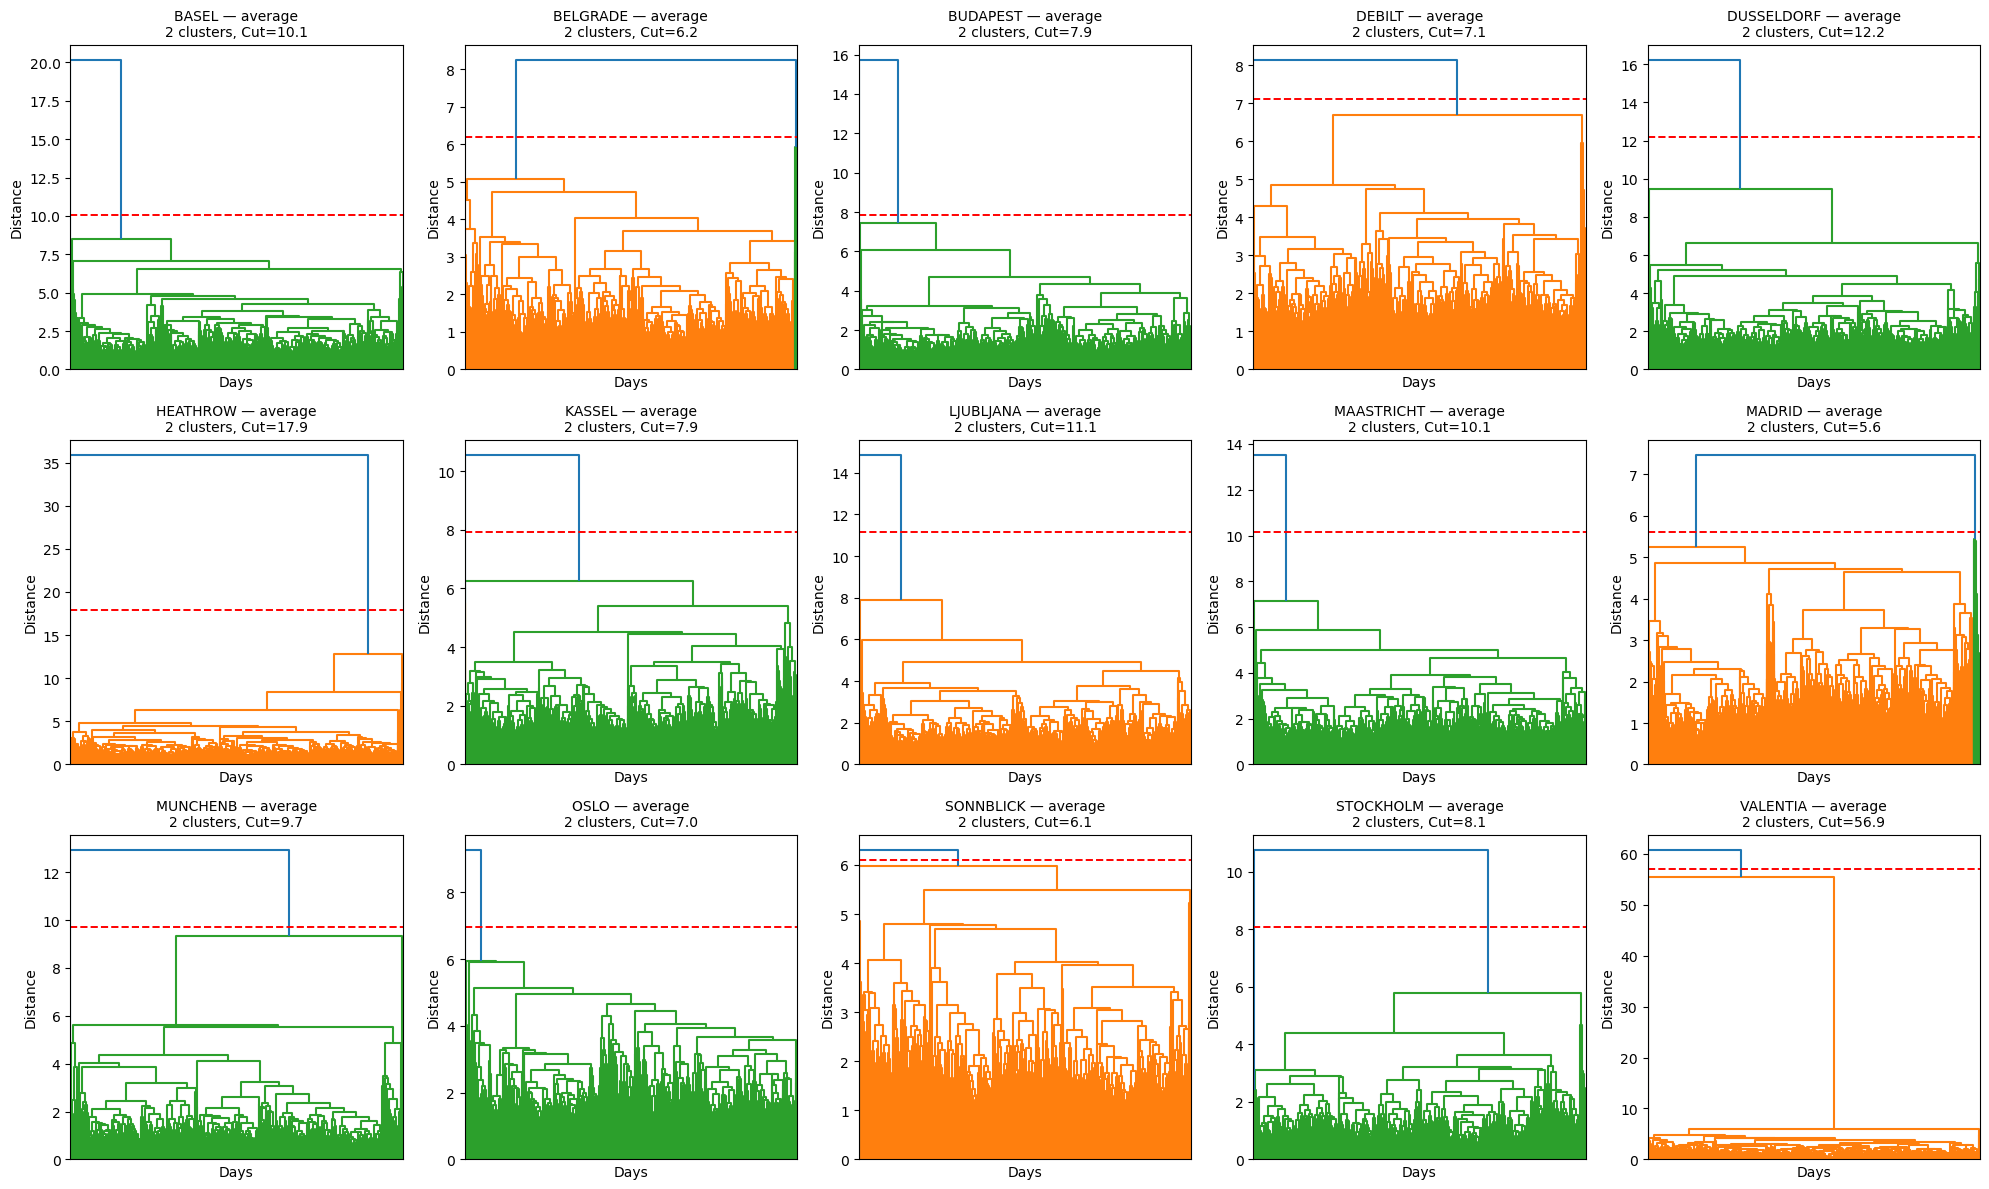

,Method,Chosen_k,Cut_height,Silhouette
Station,,,,
BASEL,average,2,10.08,0.787
BELGRADE,average,2,6.19,0.523
BUDAPEST,average,2,7.86,0.750
DEBILT,average,2,7.12,0.472
DUSSELDORF,average,2,12.17,0.737
HEATHROW,average,2,17.94,0.887
KASSEL,average,2,7.91,0.622
LJUBLJANA,average,2,11.14,0.716
MAASTRICHT,average,2,10.14,0.689


,Cluster 1,Cluster 2
BASEL,4,3648
BELGRADE,3634,18
BUDAPEST,2,3650
DEBILT,3651,1
DUSSELDORF,9,3643
HEATHROW,3651,1
KASSEL,4,3648
LJUBLJANA,3651,1
MAASTRICHT,3,3649
MADRID,3587,65


In [417]:
summary, labels, counts = plot_station_dendrograms_with_summary(
    df_scaled, stations, method="average", candidate_ks=(2,3,4)
)
display(summary)
display(counts)

#### The 'average' method had very poor results using the same Silhouette score-based cutting methodology as we did for the 'ward' method.  Extreme ratio of relative class size.

In [419]:
def compare_clusters_to_answers_simple(labels_dict, answers_df, method="average"):
    results = []
    raw_cts = {}
    skipped = []

    for st, lab in labels_dict.items():
        col = f"{st}_pleasant_weather"
        if col not in answers_df.columns:
            skipped.append(st)
            continue

        ans = answers_df[col].values
        if len(ans) != len(lab):
            skipped.append(st)
            continue

        # Build contingency table
        ct = pd.crosstab(lab, ans)
        raw_cts[st] = ct

        # Flatten to per-cluster rows
        total = ct.sum(axis=1)
        pleasant_pct = ct.get(1, pd.Series(0, index=ct.index)) / total
        for cluster_id in ct.index:
            results.append({
                "Station": st,
                "Cluster": cluster_id,
                "N_obs": int(total.loc[cluster_id]),
                "Pleasant_1_pct": float(pleasant_pct.loc[cluster_id])
            })

    comp_df = pd.DataFrame(results)
    return comp_df, raw_cts, skipped

In [421]:
comp_df, raw_cts, skipped = compare_clusters_to_answers_simple(labels, pleasant_ans_2001_2010)

print("Skipped:", skipped)
display(comp_df)      # should show rows now
display(raw_cts.get("BASEL"))  # should show the contingency table for Basel

Skipped: []


,Station,Cluster,N_obs,Pleasant_1_pct
0,BASEL,1,4,0.000000
1,BASEL,2,3648,0.248904
2,BELGRADE,1,3634,0.358008
3,BELGRADE,2,18,0.000000
4,BUDAPEST,1,2,0.000000
5,BUDAPEST,2,3650,0.351507
6,DEBILT,1,3651,0.214462
7,DEBILT,2,1,0.000000
8,DUSSELDORF,1,9,0.000000
9,DUSSELDORF,2,3643,0.220972


col_0,0,1
row_0,,
1,4,0
2,2740,908


In [423]:
station_summary = summarize_station_clusters(comp_df, min_support_frac=0.05)  # 5% support
display(station_summary)

,Station,PleasantHeavy_Cluster,PleasantHeavy_PleasantPct,PleasantHeavy_N,Largest_Cluster,Largest_PleasantPct,Largest_N,Total_Obs,Overall_PleasantRate
0,BASEL,2,0.248904,3648,2,0.248904,3648,3652,0.248631
1,BELGRADE,1,0.358008,3634,1,0.358008,3634,3652,0.356243
2,BUDAPEST,2,0.351507,3650,2,0.351507,3650,3652,0.351314
3,DEBILT,1,0.214462,3651,1,0.214462,3651,3652,0.214403
4,DUSSELDORF,2,0.220972,3643,2,0.220972,3643,3652,0.220427
5,HEATHROW,1,0.225144,3651,1,0.225144,3651,3652,0.225082
6,KASSEL,2,0.196272,3648,2,0.196272,3648,3652,0.196057
7,LJUBLJANA,1,0.293892,3651,1,0.293892,3651,3652,0.293812
8,MAASTRICHT,2,0.223075,3649,2,0.223075,3649,3652,0.222892
9,MADRID,1,0.468637,3587,1,0.468637,3587,3652,0.460296


In [425]:
comp_lift = add_cluster_lift_from_comp(comp_df)

# Inspect strongest Pleasant-heavy clusters
display(
    comp_lift.sort_values("PleasantLift", ascending=False).head(20)
)

,Station,Cluster,N_obs,Pleasant_1_pct,Overall_PleasantRate,PleasantLift
18,MADRID,1,3587,0.468637,0.460296,1.018121
2,BELGRADE,1,3634,0.358008,0.356243,1.004953
9,DUSSELDORF,2,3643,0.220972,0.220427,1.002470
27,STOCKHOLM,2,3644,0.185785,0.185378,1.002195
23,OSLO,2,3648,0.163925,0.163746,1.001096
1,BASEL,2,3648,0.248904,0.248631,1.001096
13,KASSEL,2,3648,0.196272,0.196057,1.001096
21,MUNCHENB,2,3648,0.225329,0.225082,1.001096
17,MAASTRICHT,2,3649,0.223075,0.222892,1.000822
5,BUDAPEST,2,3650,0.351507,0.351314,1.000548


#### The 'average' method clustered very poorly compared to the 'ward' method, when applying the Silhouette score to decide cut height and therefore, the resultant number of clusters.

### 03.04 Row-based clustering per station: "complete" method

#### Use the 'complete' clustering method to see results for individual weather stations, and comparisons with the Pleasant weather answers dataset. Call the prior-defined custom functions and output the relevant dendograms and tables.

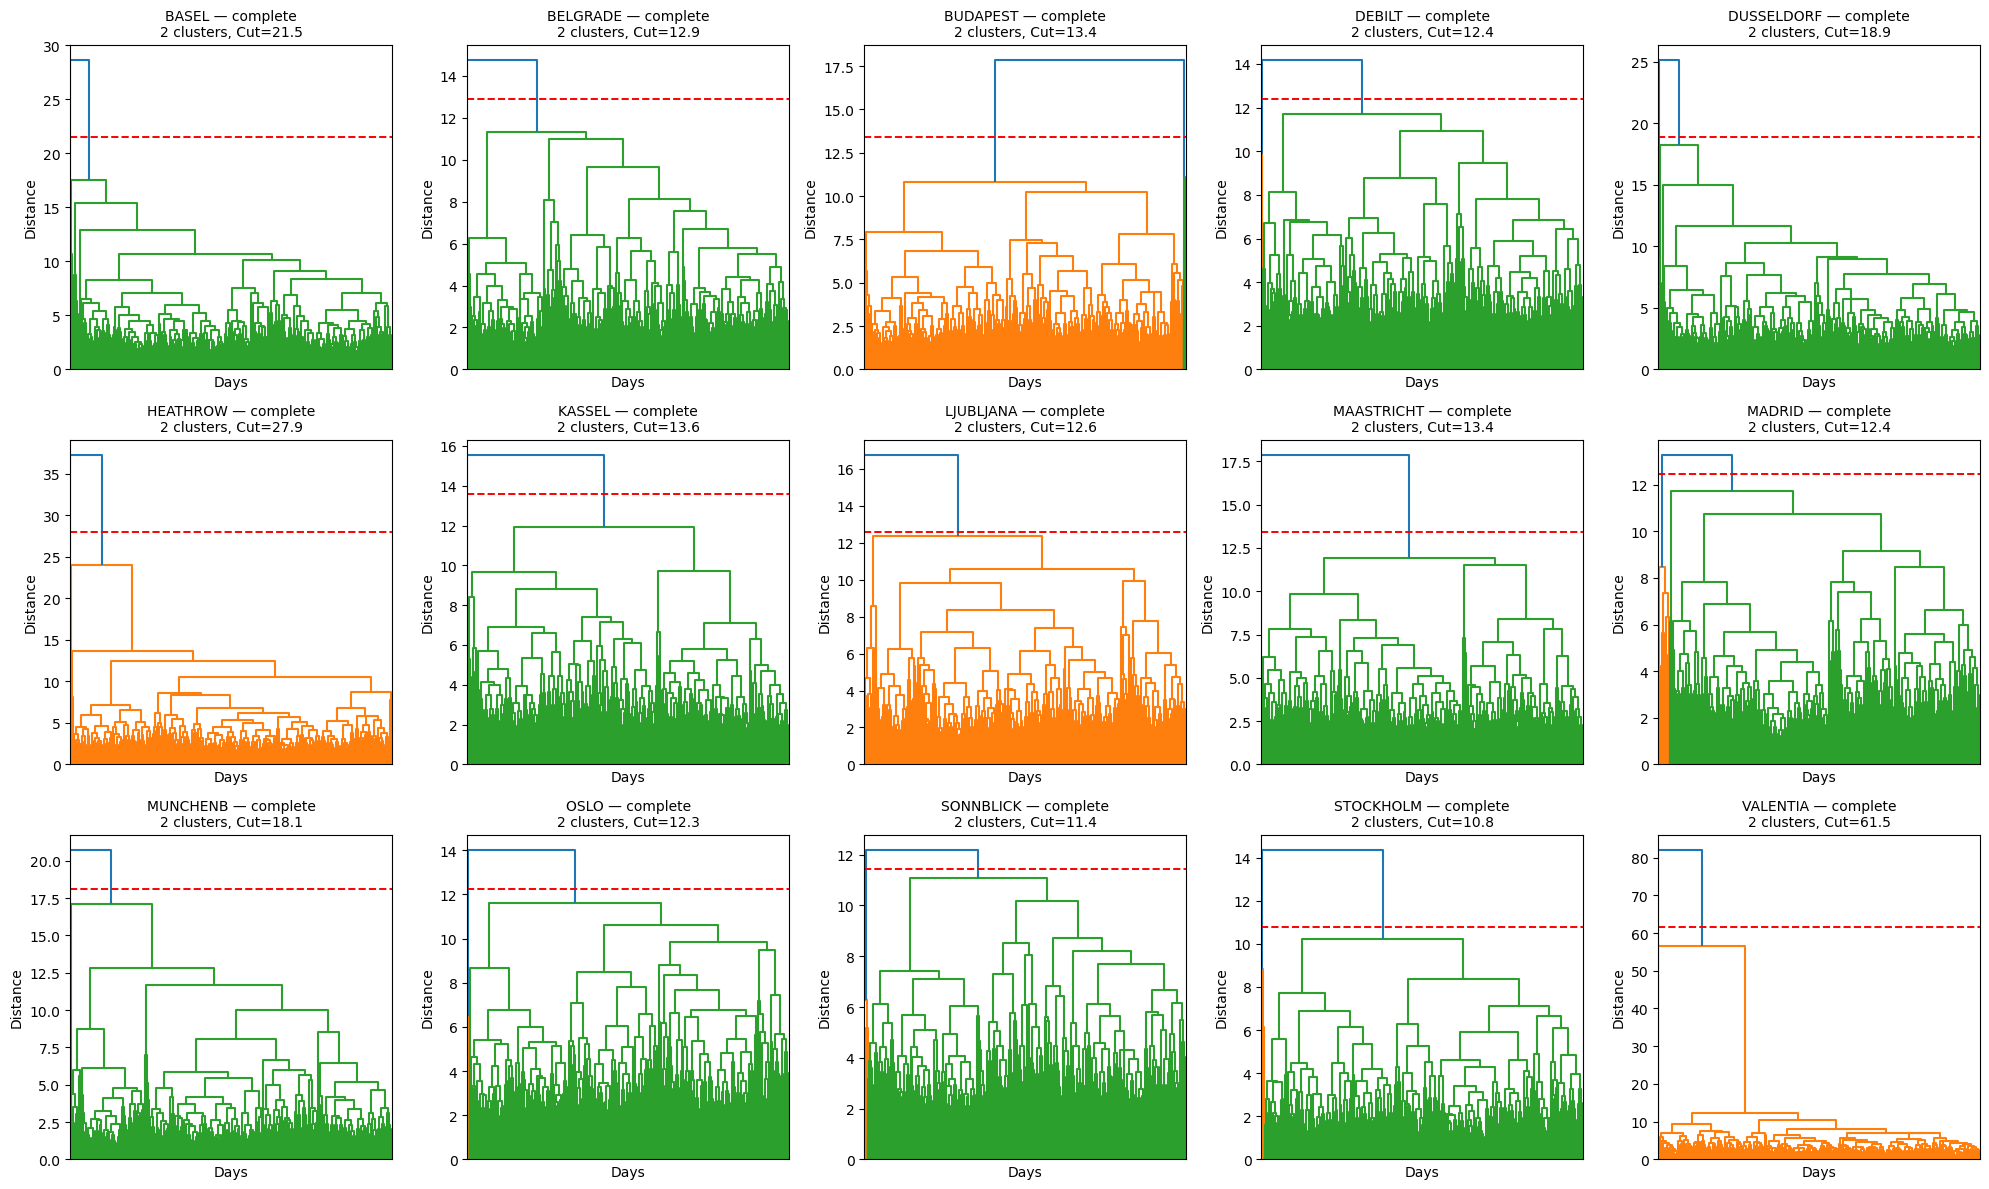

,Method,Chosen_k,Cut_height,Silhouette
Station,,,,
BASEL,complete,2,21.48,0.787
BELGRADE,complete,2,12.90,0.609
BUDAPEST,complete,2,13.39,0.549
DEBILT,complete,2,12.41,0.451
DUSSELDORF,complete,2,18.86,0.737
HEATHROW,complete,2,27.94,0.887
KASSEL,complete,2,13.60,0.622
LJUBLJANA,complete,2,12.56,0.716
MAASTRICHT,complete,2,13.40,0.689


,Cluster 1,Cluster 2
BASEL,4,3648
BELGRADE,6,3646
BUDAPEST,3629,23
DEBILT,16,3636
DUSSELDORF,9,3643
HEATHROW,3651,1
KASSEL,4,3648
LJUBLJANA,3651,1
MAASTRICHT,3,3649
MADRID,136,3516


In [428]:
summary, labels, counts = plot_station_dendrograms_with_summary(
    df_scaled, stations, method="complete", candidate_ks=(2,3,4)
)
display(summary)
display(counts)

#### The 'complete' method had very poor results using the same Silhouette score-based cutting methodology as we did for the 'ward' method.  Extreme ratio of relative class size.  We can stop here as it's not useful to go on to compare the clustering results with the Pleasant weather answers dataset.

### 03.05 Row-based clustering per station: "single" method

#### Use the 'single' clustering method to see results for individual weather stations, and comparisons with the Pleasant weather answers dataset. Call the prior-defined custom functions and output the relevant dendograms and tables.

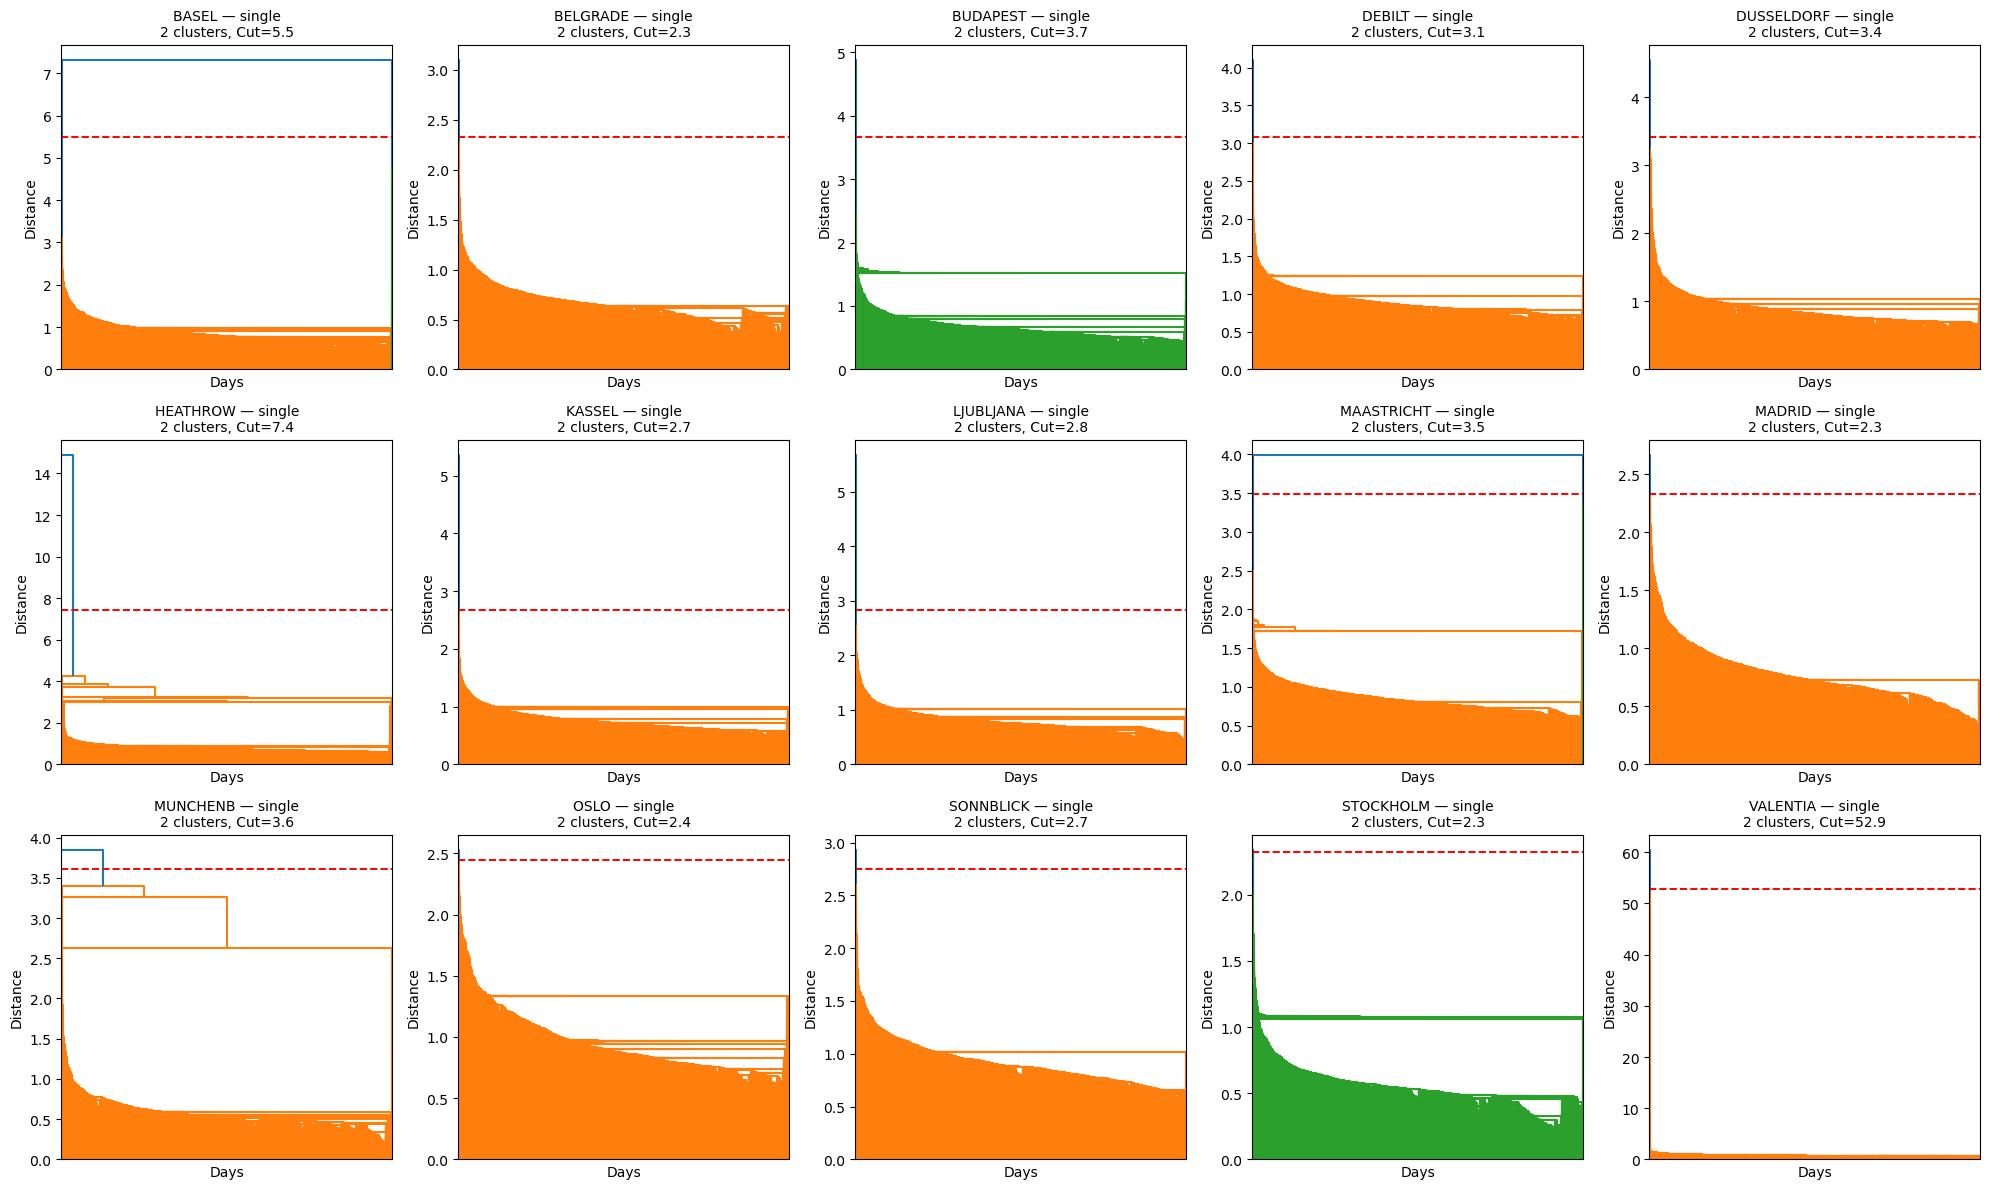

,Method,Chosen_k,Cut_height,Silhouette
Station,,,,
BASEL,single,2,5.48,0.787
BELGRADE,single,2,2.32,0.684
BUDAPEST,single,2,3.66,0.750
DEBILT,single,2,3.08,0.592
DUSSELDORF,single,2,3.41,0.678
HEATHROW,single,2,7.44,0.887
KASSEL,single,2,2.68,0.707
LJUBLJANA,single,2,2.84,0.716
MAASTRICHT,single,2,3.49,0.689


,Cluster 1,Cluster 2
BASEL,3648,4
BELGRADE,3651,1
BUDAPEST,2,3650
DEBILT,3651,1
DUSSELDORF,3651,1
HEATHROW,3651,1
KASSEL,3651,1
LJUBLJANA,3651,1
MAASTRICHT,3649,3
MADRID,3651,1


In [432]:
summary, labels, counts = plot_station_dendrograms_with_summary(
    df_scaled, stations, method="single", candidate_ks=(2,3,4)
)
display(summary)
display(counts)

#### The 'single' method had very poor results using the same Silhouette score-based cutting methodology as we did for the 'ward' method.  Extreme ratio of relative class size.  We can stop here as it's not useful to go on to compare the clustering results with the Pleasant weather answers dataset.

### 04. Dendrograms for stationarized weather data

#### For comparative purposes, we will apply the best-outcome clustering approach adopted for the z-score rescaled weather dataset, to the stationarized weather dataset. Weather data for the latter dataset was stationarized via a 2-step transformation: first differencing, followed by z-score rescaling. This was designed to remove trend and seasonality from the weather data, to find non-trend or seasonality-driven patterns in the data. One question is whether it leads to better or significantly different clustering results, relative to finding matches with the Pleasant weather answers dataset.

#### Wrangle the Pleasant weather answers dataset

In [493]:
# Check the stationarized weather dataset
df_diff_scaled.shape

(3651, 147)

In [495]:
df_diff_scaled.head(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.414554,0.000247,1.492755,-0.768732,0.030711,-0.309350,-0.001318,-3.756659e-18,2.665400,2.028831,...,-1.660843,-1.141284,2.161807,0.150416,-0.418243,0.0,0.410732,-1.294483,-0.688063,-1.073897
1,-0.829449,0.000247,-1.264960,1.430894,0.291643,-1.489704,-0.001318,5.790880e-01,0.183903,-0.084631,...,1.107734,1.141784,0.600874,-0.150564,0.396390,0.0,-0.387008,-0.136562,-0.849944,0.776127
2,0.414554,0.000247,0.113898,-0.727229,-0.368362,0.059511,-0.001318,-5.308307e-01,-0.137773,-0.000093,...,0.000303,0.114404,-0.079136,0.300906,-0.453471,0.0,0.604123,0.204003,0.161815,0.119667


In [500]:
# Check the Pleasant weather answers dataset
pleasant_ans_2001_2010.shape

(3652, 15)

In [502]:
pleasant_ans_2001_2010.head(3)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [512]:
# We have a 1-row count mismatch between the stationarized weather dataset and the Pleasant weather answers dataset
# This is due (as expected) to the daily differencing first-step transformation, which created a NaN for 2001-01-01
# Therefore, we need to remove the same day (the first row) of the Pleasant weather answers dataset to match dimensions
pleasant_ans_2001_2010_reduced = pleasant_ans_2001_2010.reset_index()
pleasant_ans_2001_2010_reduced.drop(pleasant_ans_2001_2010_reduced.index[0], inplace=True)

In [514]:
pleasant_ans_2001_2010_reduced.shape

(3651, 16)

In [516]:
pleasant_ans_2001_2010_reduced.head(3)

,index,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
1,14977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [518]:
pleasant_ans_2001_2010_reduced.drop('index', axis=1, inplace=True)

In [520]:
pleasant_ans_2001_2010_reduced.shape

(3651, 15)

In [522]:
pleasant_ans_2001_2010_reduced.head(3)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 04.01 Row-based clustering per station: "ward" method

#### We use the same code blocks as earlier but with the different (stationarized) weather dataset

#### Specify the list of stations to explore

In [526]:
stations = [
    "BASEL","BELGRADE","BUDAPEST","DEBILT","DUSSELDORF",
    "HEATHROW","KASSEL","LJUBLJANA","MAASTRICHT","MADRID",
    "MUNCHENB","OSLO","SONNBLICK","STOCKHOLM","VALENTIA"
]

#### Call the custom function

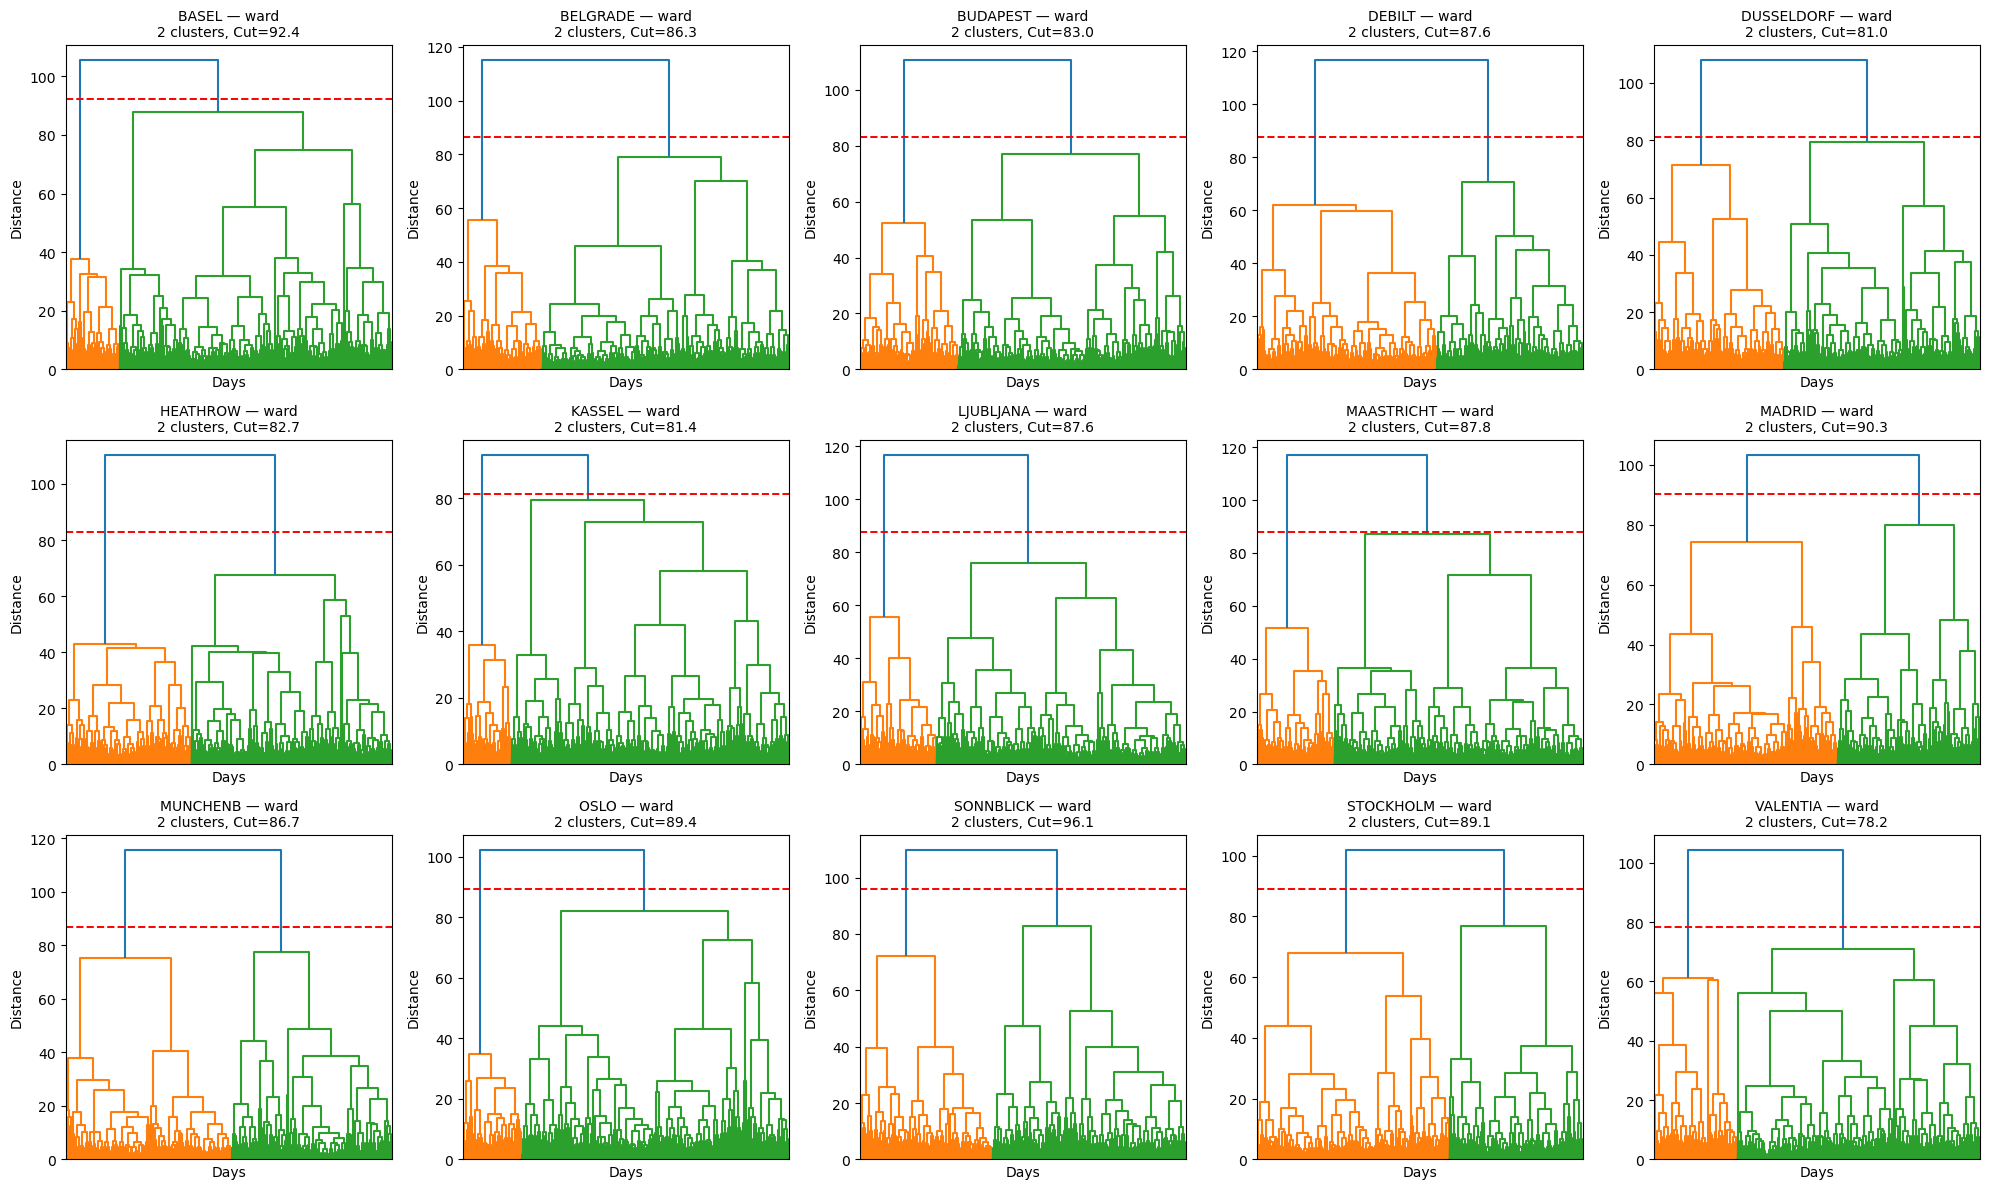

,Method,Chosen_k,Cut_height,Silhouette
Station,,,,
BASEL,ward,2,92.37,0.205
BELGRADE,ward,2,86.32,0.239
BUDAPEST,ward,2,82.96,0.193
DEBILT,ward,2,87.57,0.166
DUSSELDORF,ward,2,81.02,0.135
HEATHROW,ward,2,82.75,0.154
KASSEL,ward,2,81.42,0.197
LJUBLJANA,ward,2,87.56,0.222
MAASTRICHT,ward,2,87.80,0.218


,Cluster 1,Cluster 2
BASEL,607,3044
BELGRADE,891,2760
BUDAPEST,1102,2549
DEBILT,2019,1632
DUSSELDORF,1461,2190
HEATHROW,1408,2243
KASSEL,544,3107
LJUBLJANA,859,2792
MAASTRICHT,870,2781
MADRID,2059,1592


In [530]:
summary, labels, counts = plot_station_dendrograms_with_summary(
    df_diff_scaled, stations, method="ward", candidate_ks=(2,3,4)
)
display(summary)
display(counts)

In [532]:
def compare_clusters_to_answers_simple(labels_dict, answers_df, method="ward"):
    results = []
    raw_cts = {}
    skipped = []

    for st, lab in labels_dict.items():
        col = f"{st}_pleasant_weather"
        if col not in answers_df.columns:
            skipped.append(st)
            continue

        ans = answers_df[col].values
        if len(ans) != len(lab):
            skipped.append(st)
            continue

        # Build contingency table
        ct = pd.crosstab(lab, ans)
        raw_cts[st] = ct

        # Flatten to per-cluster rows
        total = ct.sum(axis=1)
        pleasant_pct = ct.get(1, pd.Series(0, index=ct.index)) / total
        for cluster_id in ct.index:
            results.append({
                "Station": st,
                "Cluster": cluster_id,
                "N_obs": int(total.loc[cluster_id]),
                "Pleasant_1_pct": float(pleasant_pct.loc[cluster_id])
            })

    comp_df = pd.DataFrame(results)
    return comp_df, raw_cts, skipped

In [534]:
comp_df, raw_cts, skipped = compare_clusters_to_answers_simple(labels, pleasant_ans_2001_2010_reduced)

print("Skipped:", skipped)
display(comp_df)      
display(raw_cts.get("BASEL"))  # should show the contingency table for Basel

Skipped: []


,Station,Cluster,N_obs,Pleasant_1_pct
0,BASEL,1,607,0.087315
1,BASEL,2,3044,0.280880
2,BELGRADE,1,891,0.135802
3,BELGRADE,2,2760,0.427536
4,BUDAPEST,1,1102,0.208711
5,BUDAPEST,2,2549,0.413103
6,DEBILT,1,2019,0.261020
7,DEBILT,2,1632,0.156863
8,DUSSELDORF,1,1461,0.134839
9,DUSSELDORF,2,2190,0.277626


col_0,0,1
row_0,,
1,554,53
2,2189,855


#### Very weak results!  The highest proportion of Pleasant days in any of the clusters was 0.54 for Madrid, and for most clusters that metric was much smaller.  Signals in the data are lost.

In [536]:
station_summary = summarize_station_clusters(comp_df, min_support_frac=0.05)  # 5% support
display(station_summary)

,Station,PleasantHeavy_Cluster,PleasantHeavy_PleasantPct,PleasantHeavy_N,Largest_Cluster,Largest_PleasantPct,Largest_N,Total_Obs,Overall_PleasantRate
0,BASEL,2,0.280880,3044,2,0.280880,3044,3651,0.248699
1,BELGRADE,2,0.427536,2760,2,0.427536,2760,3651,0.356341
2,BUDAPEST,2,0.413103,2549,2,0.413103,2549,3651,0.351411
3,DEBILT,1,0.261020,2019,1,0.261020,2019,3651,0.214462
4,DUSSELDORF,2,0.277626,2190,2,0.277626,2190,3651,0.220488
5,HEATHROW,2,0.271957,2243,2,0.271957,2243,3651,0.225144
6,KASSEL,2,0.217573,3107,2,0.217573,3107,3651,0.196111
7,LJUBLJANA,2,0.346347,2792,2,0.346347,2792,3651,0.293892
8,MAASTRICHT,2,0.257102,2781,2,0.257102,2781,3651,0.222953
9,MADRID,1,0.544439,2059,1,0.544439,2059,3651,0.460422


In [538]:
comp_lift = add_cluster_lift_from_comp(comp_df)

# Inspect strongest Pleasant-heavy clusters
display(
    comp_lift.sort_values("PleasantLift", ascending=False).head(20)
)

,Station,Cluster,N_obs,Pleasant_1_pct,Overall_PleasantRate,PleasantLift
20,MUNCHENB,1,1864,0.337983,0.225144,1.501187
28,VALENTIA,1,938,0.067164,0.048480,1.385403
9,DUSSELDORF,2,2190,0.277626,0.220488,1.259144
6,DEBILT,1,2019,0.261020,0.214462,1.217095
11,HEATHROW,2,2243,0.271957,0.225144,1.207927
3,BELGRADE,2,2760,0.427536,0.356341,1.199796
18,MADRID,1,2059,0.544439,0.460422,1.182479
15,LJUBLJANA,2,2792,0.346347,0.293892,1.178483
5,BUDAPEST,2,2549,0.413103,0.351411,1.175557
17,MAASTRICHT,2,2781,0.257102,0.222953,1.153168


#### When applying the 'ward' clustering method on stationarized data, the maximum PleasantLift amongst the stations collapsed to only 1.5x, confirming that stationarization strips out the very seasonal and trend-driven structures where clusters find patterns.  For clustering tasks seeking to discover long-term climate patterns, z-score rescaling *without* differencing has provided more meaningful insights so far. It appears that stationarization works better for time-series forecasting, but not for clustering or PCA.

### 05. Principal Component Analysis (PCA)

### 05.01 Import libraries, functions and tiny helpers

In [552]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.pipeline import make_pipeline

### 05.02 Fit PCA: globally on all 147 station-features

In [555]:
# df_scaled is already z-scored, so PCA can be used directly.
# If using the raw (unscaled) dataset instead, then adjust top line to: `use_scaler=True`

use_scaler = False

def fit_pca(X: pd.DataFrame, n_components=None, use_scaler=False):
    pipe = make_pipeline(StandardScaler(with_mean=True, with_std=True), PCA(n_components=n_components)) if use_scaler else PCA(n_components=n_components)
    model = pipe.fit(X)
    # pull PCA object from the pipeline or plain PCA
    pca = model.named_steps['pca'] if use_scaler else model
    return model, pca

pca_model, pca = fit_pca(df_scaled, n_components=None, use_scaler=use_scaler)
explained = pca.explained_variance_ratio_
cumexp = np.cumsum(explained)

### Scree + cumulative variance plots

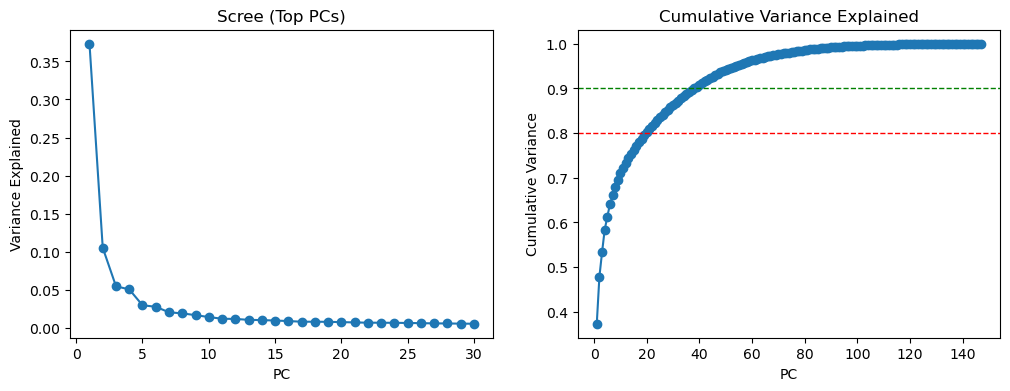

PCs for ≥80% variance: 20


In [558]:
def plot_scree_cumulative(explained, cumexp, top=30):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    k = min(top, len(explained))

    ax[0].plot(np.arange(1, k+1), explained[:k], marker='o')
    ax[0].set_title('Scree (Top PCs)')
    ax[0].set_xlabel('PC')
    ax[0].set_ylabel('Variance Explained')

    ax[1].plot(np.arange(1, len(cumexp)+1), cumexp, marker='o')
    ax[1].axhline(0.80, color='r', ls='--', lw=1)
    ax[1].axhline(0.90, color='g', ls='--', lw=1)
    ax[1].set_title('Cumulative Variance Explained')
    ax[1].set_xlabel('PC')
    ax[1].set_ylabel('Cumulative Variance')
    plt.show()

plot_scree_cumulative(explained, cumexp, top=30)

# pick a K PCs threshold (e.g., 80%)
K80 = int(np.argmax(cumexp >= 0.80) + 1)
print("PCs for ≥80% variance:", K80)

### PC scores (the transformed data) and loadings (station-feature weights)

In [562]:
# Scores: 3652 × n_components (one column per PC)
scores = pca_model.transform(df_scaled)   # np.array
scores_df = pd.DataFrame(scores, index=df_scaled.index,
                         columns=[f'PC{i+1}' for i in range(scores.shape[1])])

# Loadings: 147 × n_components (rows=original station-features)
loadings = pd.DataFrame(pca.components_.T,
                        index=df_scaled.columns,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
loadings['abs_max_pc'] = loadings.abs().idxmax(axis=1)   # quick peek: which PC each feature loads on most

In [713]:
scores_df.shape

(3652, 147)

In [715]:
scores_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147
0,-10.271595,-3.296856,1.022926,-6.238022,1.505655,0.875294,0.727356,-0.785606,1.312152,-0.066805,...,-0.098366,0.012959,-0.044398,-0.021862,0.131607,-0.033941,0.034455,0.037513,0.005060,0.002575
1,-7.692770,-5.882302,-1.289673,-3.706292,2.717943,2.089408,-0.546597,-0.182383,0.792067,1.064329,...,0.031671,-0.023946,0.030679,0.015667,0.104454,0.074495,0.034356,0.027894,0.004073,0.004283
2,-7.611815,-4.188861,-0.388038,-2.583488,3.374517,2.808071,0.778842,0.164833,-0.117697,-0.290523,...,0.054070,0.007093,0.014390,-0.009328,-0.058863,-0.088371,0.056757,0.004224,-0.000279,0.002536


In [717]:
scores_df.tail(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147
3649,-11.979900,2.599468,1.090379,1.798030,-0.178052,-3.758274,1.558136,2.527586,1.515106,1.889787,...,-0.048162,-0.041729,0.051562,-0.017879,0.005124,0.032418,-0.008216,0.016082,-0.001145,-0.003547
3650,-12.238020,4.620437,0.872143,0.906333,2.095376,-3.183547,0.901289,1.894778,0.015657,-0.091032,...,-0.037732,-0.027496,-0.051008,0.052630,-0.029207,-0.122056,-0.039473,0.013198,-0.000941,0.002498
3651,-12.394121,2.085038,2.983681,0.825967,0.883701,-2.790491,1.024923,0.511049,-1.108619,-0.484854,...,0.017918,0.004978,0.033282,0.092257,0.019934,0.000210,0.004760,-0.005044,-0.000175,-0.004342


### 05.03 Export PCs (Principal Components), scaled weather subset and Pleasant answers subset datasets

In [721]:
# Export full dataframe of PCs for maximum manipulation and exploration optionality

path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets\Unsupervised'
scores_df.to_csv(os.path.join(path, 'weather_data_scaled_pc_147_scores.csv'), index=False)

In [727]:
# Export scaled weather subset dataframe for 2001-2010
df_scaled.to_csv(os.path.join(path, 'weather_data_scaled_2001-2010.csv'), index=False)

In [729]:
# Export Pleasant weather answers subset dataframe for 2001-2010 with no 'DATE' column or 'DATE' index
pleasant_ans_2001_2010.to_csv(os.path.join(path, 'pleasant_ans_2001_2010_no_date.csv'), index=False)

In [731]:
# Export Pleasant weather answers subset dataframe for 2001-2010 with 'DATE' column
df2_2001_2010.to_csv(os.path.join(path, 'pleasant_ans_2001_2010.csv'), index=False)

In [733]:
# Export unscaled weather subset dataframe for 2001-2010 with 'DATE' column
df_2001_2010.to_csv(os.path.join(path, 'weather_data_unscaled_2001_2010.csv'), index=False)